#  Image Classification

# 데이터 로드 및 데이터 살펴보기

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [5]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

path = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

In [6]:
train_dir = os.path.join(path, 'train')
validation_dir = os.path.join(path, 'validation')
print(train_dir)
print(validation_dir)

/aiffel/.keras/datasets/cats_and_dogs_filtered/train
/aiffel/.keras/datasets/cats_and_dogs_filtered/validation


In [7]:
# directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats') 
print(train_cats_dir)

# directory with our training dog pictures 
train_dogs_dir = os.path.join(train_dir, 'dogs')  
print(train_dogs_dir)

# directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  
print(validation_cats_dir)

# directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  
print(validation_dogs_dir)

/aiffel/.keras/datasets/cats_and_dogs_filtered/train/cats
/aiffel/.keras/datasets/cats_and_dogs_filtered/train/dogs
/aiffel/.keras/datasets/cats_and_dogs_filtered/validation/cats
/aiffel/.keras/datasets/cats_and_dogs_filtered/validation/dogs


In [8]:
num_cats_tr = len(os.listdir(train_cats_dir))
print('total training cat images:', num_cats_tr)
num_dogs_tr = len(os.listdir(train_dogs_dir))
print('total training dog images:', num_dogs_tr)

print("--")

num_cats_val = len(os.listdir(validation_cats_dir))
print('total validation cat images:', num_cats_val)
num_dogs_val = len(os.listdir(validation_dogs_dir))
print('total validation dog images:', num_dogs_val)

print("--")

total_train = num_cats_tr + num_dogs_tr
print("Total training images:", total_train)
total_val = num_cats_val + num_dogs_val
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
--
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [9]:
# parameter Initialization
batch_size = 16
epochs = 5
IMG_HEIGHT = 256
IMG_WIDTH = 256

In [10]:
# 데이터를 시각화하기 위한 함수
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [11]:
# Training data generator
image_gen_train = ImageDataGenerator(rescale=1./255,
                                     rotation_range=0.3,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     zoom_range=0.2,
                                     horizontal_flip=True, 
                                     vertical_flip=False)

In [12]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


In [13]:
train_data_gen[0][0].shape

(16, 256, 256, 3)

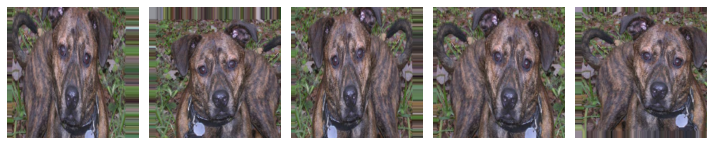

In [14]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [15]:
# Validation data generator
image_gen_val = ImageDataGenerator(rescale=1./255)

In [16]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


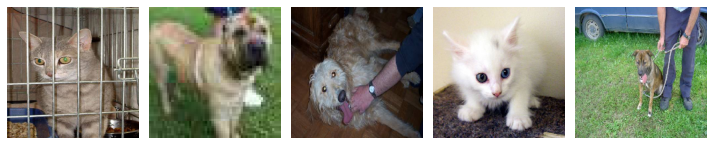

In [17]:
sample_training_images, _ = next(val_data_gen)
plotImages(sample_training_images[:5])

In [18]:
_[:5] # 정답 데이터

array([0., 1., 1., 0., 1.], dtype=float32)

# 모델 구현

In [23]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense

In [24]:
# 모델이 너무 커서 주석처리
# def create_vgg16_model():
#     model = Sequential([
       
#         Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
#         Conv2D(64, (3, 3), activation='relu', padding='same'),
#         MaxPooling2D((2, 2), strides=(2, 2)),
        
        
#         Conv2D(128, (3, 3), activation='relu', padding='same'),
#         Conv2D(128, (3, 3), activation='relu', padding='same'),
#         MaxPooling2D((2, 2), strides=(2, 2)),
        
     
#         Conv2D(256, (3, 3), activation='relu', padding='same'),
#         Conv2D(256, (3, 3), activation='relu', padding='same'),
#         Conv2D(256, (3, 3), activation='relu', padding='same'),
#         MaxPooling2D((2, 2), strides=(2, 2)),
        
       
#         Conv2D(512, (3, 3), activation='relu', padding='same'),
#         Conv2D(512, (3, 3), activation='relu', padding='same'),
#         Conv2D(512, (3, 3), activation='relu', padding='same'),
#         MaxPooling2D((2, 2), strides=(2, 2)),
        
        
#         Conv2D(512, (3, 3), activation='relu', padding='same'),
#         Conv2D(512, (3, 3), activation='relu', padding='same'),
#         Conv2D(512, (3, 3), activation='relu', padding='same'),
#         MaxPooling2D((2, 2), strides=(2, 2)),
        
        
#         Flatten(),
#         Dense(4096, activation='relu'),
#         Dense(4096, activation='relu'),
#         Dense(1000, activation='relu'),
#         Dense(1, activation='sigmoid')  # Binary classification (dog or cat)
#     ])
    
#     return model

# # 모델 생성
# model = create_vgg16_model()

# # 손실 함수, 옵티마이저, 메트릭 정의
# loss_function = tf.keras.losses.binary_crossentropy
# optimize = tf.keras.optimizers.Adam(learning_rate=0.01)
# metric = tf.keras.metrics.binary_accuracy

# # 모델 컴파일
# model.compile(loss=loss_function,
#               optimizer=optimize,
#               metrics=[metric])

# # 콜백 정의
# callbacks_list = [
#     tf.keras.callbacks.TensorBoard(log_dir='log_dir', histogram_freq=1),
#     tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss'),
#     tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5', save_best_only=True, monitor='val_loss')
# ]


# # 모델 요약
# model.summary()

In [25]:
def create_simplified_vgg16_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2), strides=(2, 2)),
        
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2), strides=(2, 2)),
        
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2), strides=(2, 2)),
        
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2), strides=(2, 2)),
        
        GlobalAveragePooling2D(),  # Flatten 대신 사용하여 파라미터 수 감소
        
        Dense(512, activation='relu'),
        Dense(1, activation='sigmoid')  # 이진 분류 (개/고양이)
    ])
    
    return model
# 모델 생성
model = create_simplified_vgg16_model()

# 손실 함수, 옵티마이저, 메트릭 정의
loss_function = tf.keras.losses.binary_crossentropy
optimize = tf.keras.optimizers.Adam(learning_rate=0.01)
metric = tf.keras.metrics.binary_accuracy

# 모델 컴파일
model.compile(loss=loss_function,
              optimizer=optimize,
              metrics=[metric])

# 콜백 정의
callbacks_list = [
    tf.keras.callbacks.TensorBoard(log_dir='log_dir', histogram_freq=1),
    tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss'),
    tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5', save_best_only=True, monitor='val_loss')
]


# 모델 요약
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 256, 256, 32)      896       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 256, 256, 32)      9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 128, 128, 64)      18496     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 64, 64, 128)      

In [27]:
#모델 학습
history = model.fit(
    train_data_gen,
    steps_per_epoch=(len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir))) // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    callbacks=callbacks_list,
    validation_freq=1
)

Epoch 1/5
125/125 [==============================] - 32s 258ms/step - loss: 0.6933 - binary_accuracy: 0.5050 - val_loss: 0.6933 - val_binary_accuracy: 0.5000
Epoch 2/5
125/125 [==============================] - 32s 257ms/step - loss: 0.6940 - binary_accuracy: 0.4980 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 3/5
125/125 [==============================] - 32s 253ms/step - loss: 0.6937 - binary_accuracy: 0.4920 - val_loss: 0.6933 - val_binary_accuracy: 0.5000
Epoch 4/5
125/125 [==============================] - 32s 253ms/step - loss: 0.6934 - binary_accuracy: 0.5050 - val_loss: 0.6932 - val_binary_accuracy: 0.5000
Epoch 5/5
125/125 [==============================] - 32s 254ms/step - loss: 0.6938 - binary_accuracy: 0.5000 - val_loss: 0.6932 - val_binary_accuracy: 0.5000


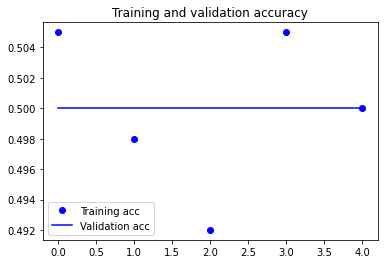

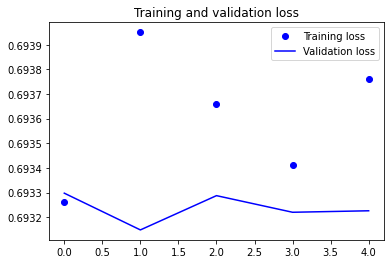

In [28]:
# 시각화
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.plot(epochs_range, acc, 'bo', label='Training acc')
plt.plot(epochs_range, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

- 커널이 죽어버리는 이슈(모델이 너무 복잡하고 큼)
- 모델 조정
- 기존 모델은 주석처리 헀고 아래에 심플화한 모델을 적용
- Global Average Pooling을 flatten 대신 사용해 연산량을 더 줄임
- TensorBoard 콜백을 포함하여 학습 과정을 시각화
- EarlyStopping 콜백을 추가하여 과적합을 방지하고 학습을 조기에 멈출 수 있게 함
- ModelCheckpoint 콜백을 추가하여 가장 좋은 성능의 모델을 저장

# 모델 조정

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [31]:
# 문제 1-2. hyperparameter 설정
IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 32
EPOCHS = 30
LEARNING_RATE = 0.001


In [32]:
# 문제 1-2. 데이터 generator 생성
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [33]:
# 문제 1-2. 모델 구현
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        
        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        
        Flatten(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    return model

model = create_model()


In [34]:
# 문제 1-2. loss function, optimizer, metric 설정 및 모델 컴파일
loss_function = tf.keras.losses.binary_crossentropy
optimizer = Adam(learning_rate=LEARNING_RATE)
metrics = ['accuracy']

model.compile(optimizer=optimizer, loss=loss_function, metrics=metrics)

# 콜백 설정
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=3),
    tf.keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True)
]

In [35]:
# 모델 학습
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    callbacks=callbacks
)

Epoch 1/30
62/62 [==============================] - 18s 263ms/step - loss: 1.1200 - accuracy: 0.5783 - val_loss: 2.0923 - val_accuracy: 0.4980
Epoch 2/30
62/62 [==============================] - 16s 257ms/step - loss: 0.7789 - accuracy: 0.6072 - val_loss: 1.2819 - val_accuracy: 0.5000
Epoch 3/30
62/62 [==============================] - 16s 256ms/step - loss: 0.7193 - accuracy: 0.6463 - val_loss: 1.7864 - val_accuracy: 0.5000
Epoch 4/30
62/62 [==============================] - 16s 253ms/step - loss: 0.6955 - accuracy: 0.6504 - val_loss: 1.5122 - val_accuracy: 0.4990
Epoch 5/30
62/62 [==============================] - 16s 256ms/step - loss: 0.6498 - accuracy: 0.6585 - val_loss: 1.2699 - val_accuracy: 0.5010
Epoch 6/30
62/62 [==============================] - 16s 256ms/step - loss: 0.6134 - accuracy: 0.6804 - val_loss: 1.4309 - val_accuracy: 0.5071
Epoch 7/30
62/62 [==============================] - 16s 255ms/step - loss: 0.6219 - accuracy: 0.6723 - val_loss: 0.6547 - val_accuracy: 0.6794

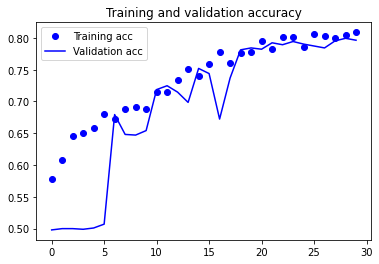

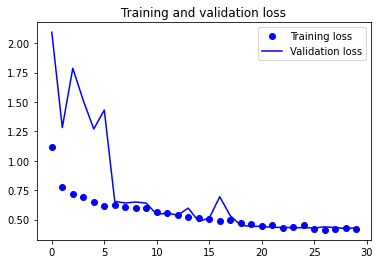

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.plot(epochs_range, acc, 'bo', label='Training acc')
plt.plot(epochs_range, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

- 모델 축소
- 배치 정규화
- 드롭 아웃
- EPOCHS = 30 등의 파라미터를 적절하게 조정
- tf.keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=3)-> 동적으로 학습률을 조정함
- 이와 같은 과정을 통해서 accuracy를 개선했다. 


# Object Detection

In [38]:
!pip3 install tensorflow-estimator==2.6.0

In [4]:
# Tensorflow와 Tensoflow Hub에 있는 이미 학습된 모델을 활용하기 위한 모듈 
import tensorflow as tf
import tensorflow_hub as hub

# 이미지를 다운로드하는 데에 사용하는 모듈
import matplotlib.pyplot as plt
import tempfile 
from six.moves.urllib.request import urlopen
from six import BytesIO

# 이미지에 선과 폰트를 넣기 위한 모듈
import numpy as np
from PIL import Image
from PIL import ImageColor
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageOps

# Detection하는 데에 소요된 시간을 점검하기 위한 모듈
import time

In [5]:
def display_image(image):
  fig = plt.figure(figsize=(20, 15))
  plt.grid(False)
  plt.imshow(image)

In [6]:
def download_and_resize_image(url, new_width=256, new_height=256, display=False): 
  
  _, filename = tempfile.mkstemp(suffix=".jpg")
  response = urlopen(url)
  image_data = response.read()
  image_data = BytesIO(image_data)  # 이미지 읽기
  pil_image = Image.open(image_data)
  pil_image = ImageOps.fit(pil_image, (new_width, new_height), Image.ANTIALIAS) # 이미지 조정
  pil_image_rgb = pil_image.convert("RGB") #RBG로 변환
  pil_image_rgb.save(filename, format="JPEG", quality=90) # 이미지 저장
  print("Image downloaded to %s." % filename)
  if display:
    display_image(pil_image)
  return filename

In [7]:
def draw_bounding_box_on_image(image, 
                               ymin, xmin, ymax, xmax,
                               color,
                               font,
                               thickness=4,
                               display_str_list=()):
  
  draw = ImageDraw.Draw(image)
  im_width, im_height = image.size
  (left, right, top, bottom) = (xmin * im_width, xmax * im_width,
                                ymin * im_height, ymax * im_height)

# BBox 테두리 그리기
  draw.line([(left, top), (left, bottom), (right, bottom), (right, top),
             (left, top)],
            width=thickness,
            fill=color)

  display_str_heights = [font.getsize(ds)[1] for ds in display_str_list]
  
  total_display_str_height = (1 + 2 * 0.05) * sum(display_str_heights)

  if top > total_display_str_height:
    text_bottom = top
  else:
    text_bottom = top + total_display_str_height
  
  for display_str in display_str_list[::-1]:
    text_width, text_height = font.getsize(display_str)
    margin = np.ceil(0.05 * text_height)
    draw.rectangle([(left, text_bottom - text_height - 2 * margin),
                    (left + text_width, text_bottom)],
                   fill=color)
    draw.text((left + margin, text_bottom - text_height - margin),
              display_str,
              fill="black",
              font=font)
    text_bottom -= text_height - 2 * margin

In [8]:
# BBox 그리기
def draw_boxes(image, boxes, class_names, scores, max_boxes=10, min_score=0.1): 
  colors = list(ImageColor.colormap.values())

  try:
    font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf",
                              25)
  except IOError:
    print("Font not found, using default font.")
    font = ImageFont.load_default()

# BBox 그리기 적용
  for i in range(min(boxes.shape[0], max_boxes)):
    if scores[i] >= min_score:
      ymin, xmin, ymax, xmax = tuple(boxes[i])  # 박스 좌표값
      display_str = "{}: {}%".format(class_names[i].decode("ascii"),
                                     int(100 * scores[i]))
      color = colors[hash(class_names[i]) % len(colors)]
      image_pil = Image.fromarray(np.uint8(image)).convert("RGB")
      draw_bounding_box_on_image(
          image_pil,
          ymin,
          xmin,
          ymax,
          xmax,
          color,
          font,
          display_str_list=[display_str])
      np.copyto(image, np.array(image_pil))
  return image

Image downloaded to /tmp/tmpgq8a9atc.jpg.


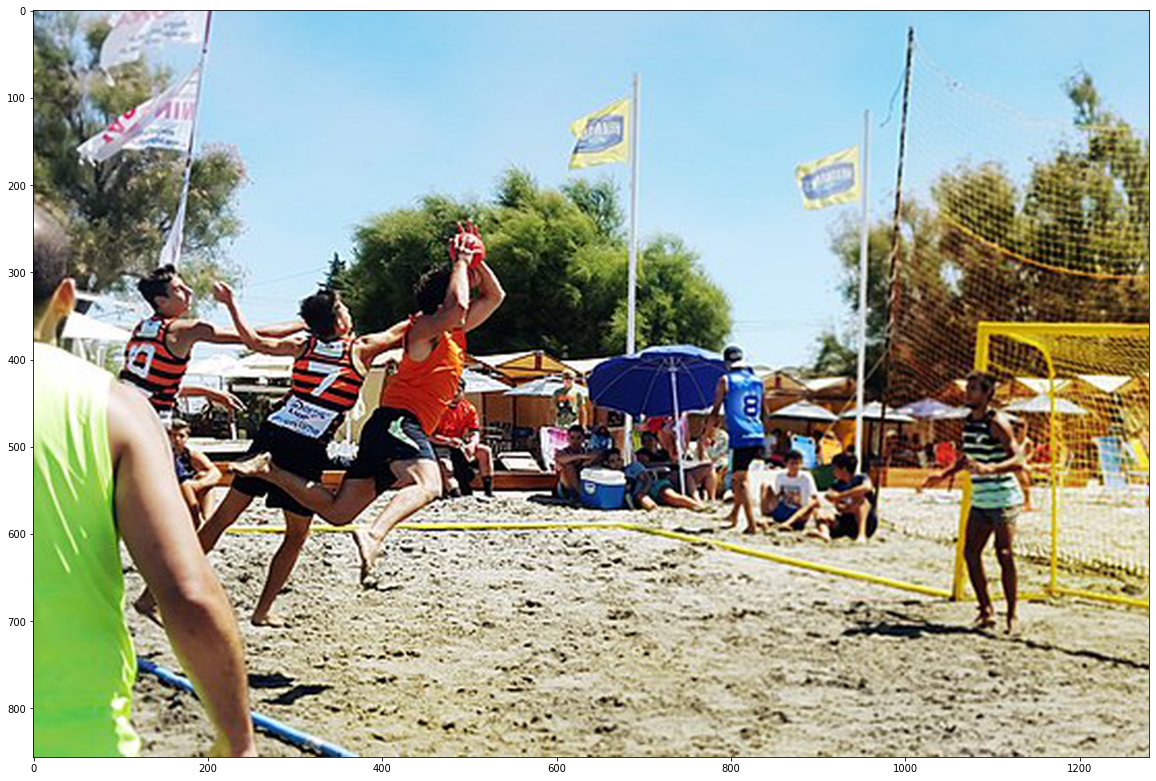

In [9]:
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/db/Torneo_beach_handball.jpg/640px-Torneo_beach_handball.jpg"
downloaded_image_path = download_and_resize_image(image_url, 1280, 856, True)  # new_width와 new_height를 변경해 보세요.

In [10]:
module_handle = "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1"  

detector = hub.load(module_handle).signatures['default'] # detector에 사용할 모듈 저장

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [11]:
def load_img(path):
  img = tf.io.read_file(path)
  img = tf.image.decode_jpeg(img, channels=3)
  return img

In [12]:
def run_detector(detector, path):
  img = load_img(path) 

  converted_img  = tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis, ...]

# 소요시간 측정
  start_time = time.time()
  result = detector(converted_img)
  end_time = time.time()

  result = {key:value.numpy() for key,value in result.items()}

# 이미지 추론 개수와 추론 시간 출력
  print("Found %d objects." % len(result["detection_scores"]))
  print("Inference time: ", end_time-start_time)

# 이미지 내 박스로 entity, scores를 추가하여 출력
  image_with_boxes = draw_boxes(
      img.numpy(), result["detection_boxes"],
      result["detection_class_entities"], result["detection_scores"])

  display_image(image_with_boxes)

Found 100 objects.
Inference time:  86.87178993225098


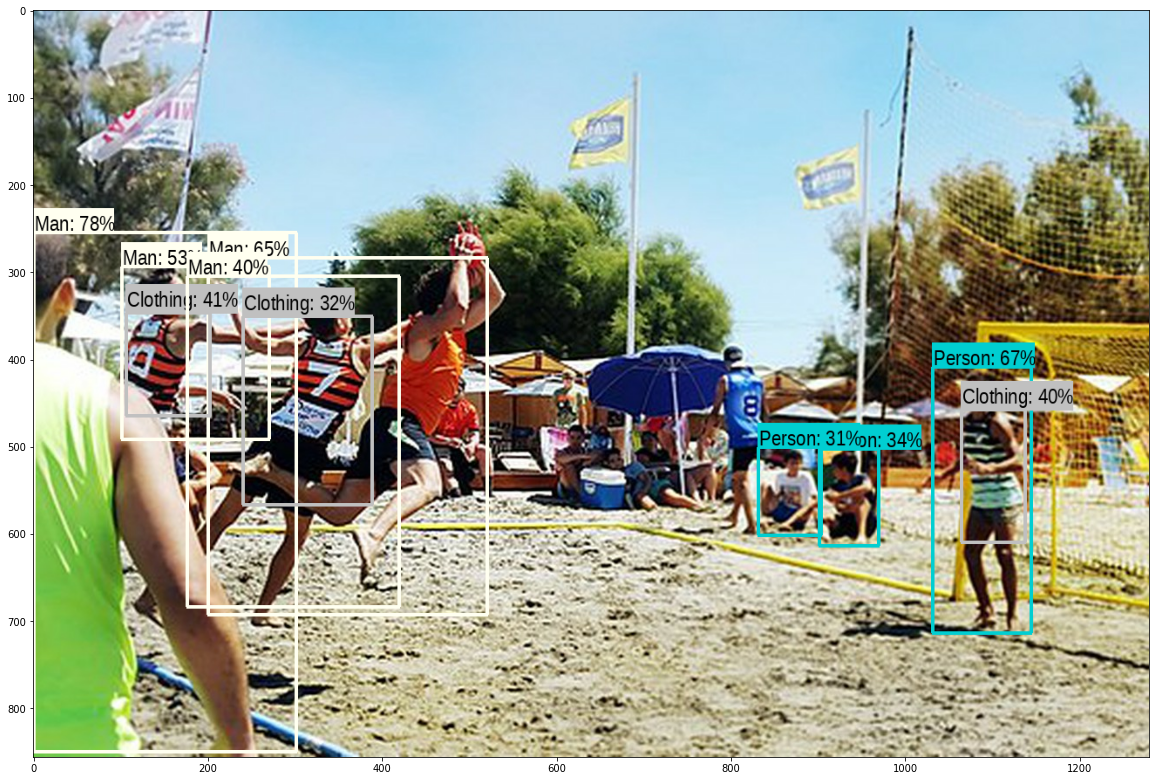

In [13]:
run_detector(detector, downloaded_image_path)

# 다른 이미지 테스트

Image downloaded to /tmp/tmpzuvvqo50.jpg.


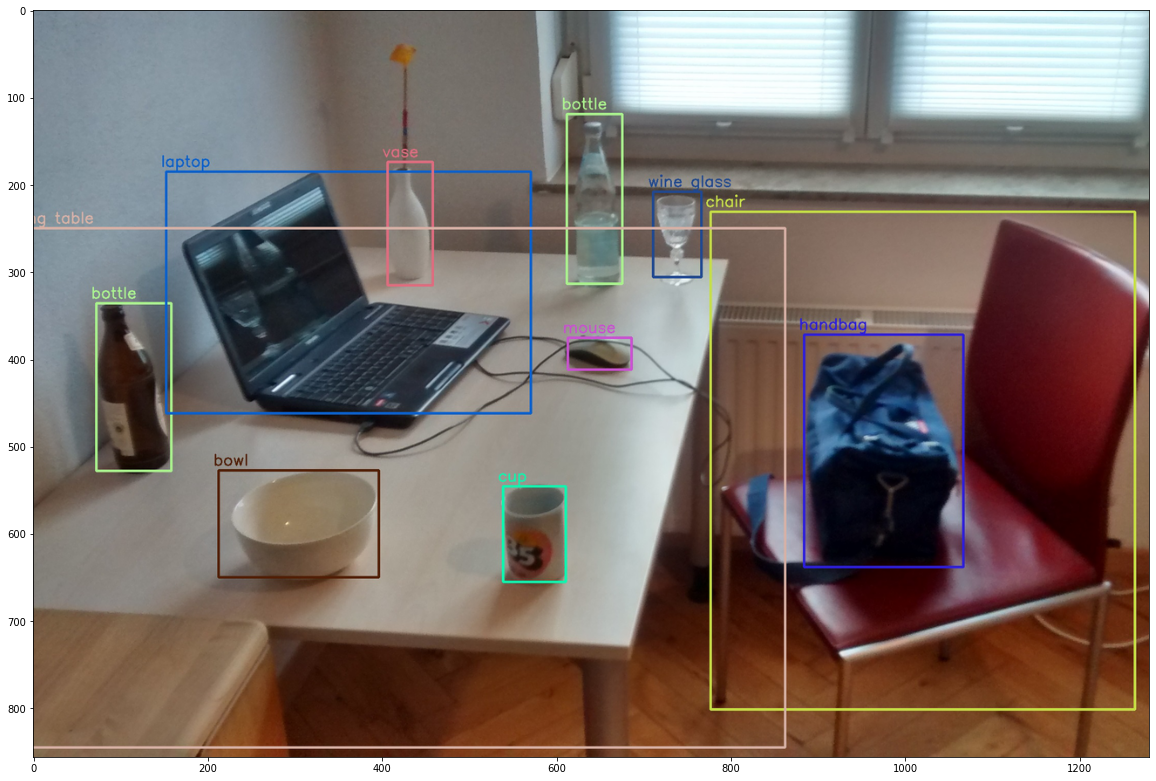

In [14]:
# 문제 2-1. 다른 이미지 테스트해보기
new_image_url = "https://upload.wikimedia.org/wikipedia/commons/3/38/Detected-with-YOLO--Schreibtisch-mit-Objekten.jpg"
# 이미지 다운로드 및 리사이즈
new_downloaded_image_path = download_and_resize_image(new_image_url, 1280, 856, True)

새로운 이미지에 대한 Faster RCNN 결과:
Found 100 objects.
Inference time:  1.698500156402588


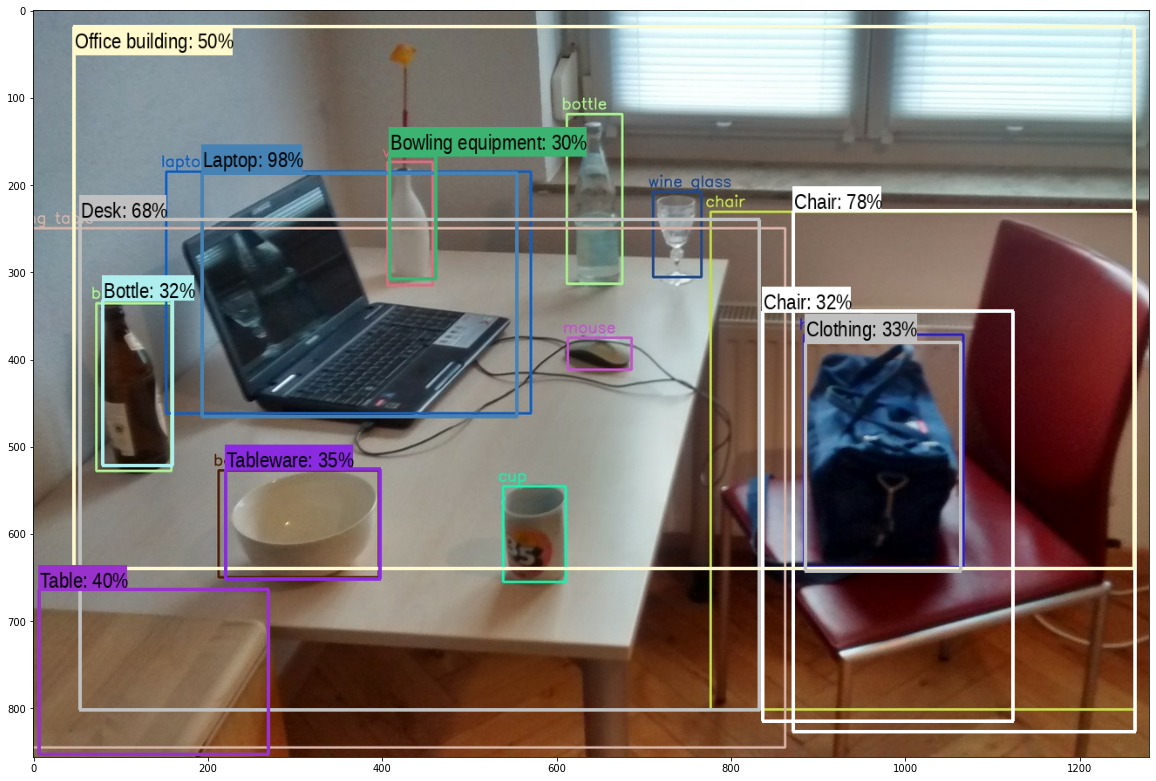

In [15]:
# Faster RCNN으로 객체 탐지 실행
print("새로운 이미지에 대한 Faster RCNN 결과:")
run_detector(detector, new_downloaded_image_path)

# 다른 모델 테스트

In [24]:
# SSD MobileNet V2 모델 로드
ssd_module_handle = "https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2"
ssd_detector = hub.load(ssd_module_handle)

In [2]:
print("\nFaster RCNN 결과:")
run_detector(detector, downloaded_image_path)

print("\nSSD MobileNet V2 결과:")
run_detector(ssd_detector, downloaded_image_path)



Faster RCNN 결과:


NameError: name 'run_detector' is not defined

- 새로운 이미지를 다운 받아서 테스트
- 오피스 공간이라는 새로운 분류가 된 것을 알 수 있다.
- 즉 yolo라는 모델을 가지고 판별한 것이라도, Faster RCNN을 사용하면 재분류가 된다는 것을 알 수 있었다.
- SSD 모델을 활용하여 진행하였는데 함수를 설정하는 과정에서 계속 오류가 생겼다. 
- 모델을 활용하는 방법에 아직 능숙하지 않아 어떤 오류인지 이해하지 못했다.
- 기존의 run_dector 함수에 ssd를 적용하였으나 실패했다.
- 아래는 새롭게 짠 코드이지만 커널이 자꾸 죽어서 고쳐지지 않았다.

In [ ]:
import tensorflow as tf
import time

def run_ssd_detector(detector, url):
    # 이미지를 다운로드하고 리사이즈합니다
    filename = download_and_resize_image(url, new_width=300, new_height=300)
    
    # 이미지를 TensorFlow Tensor로 로드합니다
    img = load_img(filename)
    
    # 이미지를 float32로 변환하고 배치 차원 추가
    converted_img = tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis, ...]
    
    # 소요시간 측정
    start_time = time.time()
    try:
        result = detector(converted_img)
    except Exception as e:
        print(f"Error during model inference: {e}")
        return
    end_time = time.time()
    
    # 결과를 numpy 배열로 변환
    result = {key: value.numpy() for key, value in result.items()}
    
    # 이미지 추론 개수와 추론 시간 출력
    print("Found %d objects." % len(result.get("detection_scores", [])))
    print("Inference time: ", end_time - start_time)
    
    # 이미지 내 박스로 entity, scores를 추가하여 출력
    image_with_boxes = draw_boxes(
        img.numpy(), result.get("detection_boxes", []),
        result.get("detection_class_entities", []), result.get("detection_scores", [])
    )
    
    display_image(image_with_boxes)